In [67]:
import numpy as np
from skimage.io import imshow, imread
import cv2
import math
import matplotlib.pyplot as plt

(667, 1000)

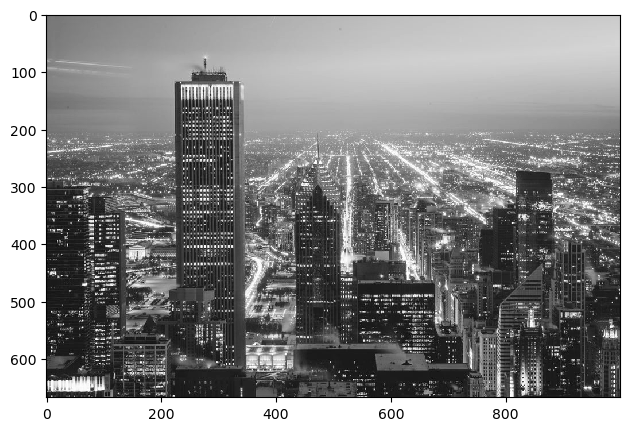

In [68]:
img = imread('img3.jpg')
gray = imread('img3.jpg', as_gray=True)
imshow(gray)
np.asarray(gray).shape

In [69]:
kernel = np.array( [ 
            [1,2,1],
            [2,4,1],
            [1,2,1],
] )
kernel

array([[1, 2, 1],
       [2, 4, 1],
       [1, 2, 1]])

In [70]:
kheight, kwidth = kernel.shape

In [71]:
def pad_image(image, pad_height, pad_width):
    """
    Pad the given image with zero padding.

    Parameters:
    - image: 2D list or array representing the original image
    - pad_height: Number of zero padding rows to add above and below the image
    - pad_width: Number of zero padding columns to add to the left and right of the image

    Returns:
    - padded_image: 2D list or array representing the padded image
    """
    # Get the dimensions of the original image
    height, width = len(image), len(image[0])

    # Calculate the dimensions of the padded image
    padded_height = height + 2 * pad_height
    padded_width = width + 2 * pad_width

    # Create a new array to store the padded image
    padded_image = [[0] * padded_width for _ in range(padded_height)]

    # Copy the original image into the center of the padded array
    for i in range(height):
        for j in range(width):
            padded_image[i + pad_height][j + pad_width] = image[i][j]

    return padded_image


In [72]:
# Define the amount of padding you want to add
top_pad = 1
bottom_pad = 1
left_pad = 1
right_pad = 1

# Pad the image with zeros using np.pad
padded_image = np.pad(gray, ((top_pad, bottom_pad), (left_pad, right_pad)), mode='constant')
padded_image.shape

(669, 1002)

In [73]:
def convolution(img, kernel):

    if img.ndim == 3:
        result = np.zeros(shape=(img.shape[0], img.shape[1]))
        result1 = np.zeros(shape=(img.shape[0], img.shape[1]))
        result2 = np.zeros(shape=(img.shape[0], img.shape[1]))
        result3 = np.zeros(shape=(img.shape[0], img.shape[1]))

        kernel2 = kernel + 2
        kernel3 = kernel * 2

        channel1 = pad_image(img[:,:,0], top_pad, left_pad)
        channel1 = np.asarray(channel1)

        channel2 = pad_image(img[:,:,1], top_pad, left_pad) 
        channel2 = np.asarray(channel2)

        channel3 = pad_image(img[:,:,2], top_pad, left_pad) 
        channel3 = np.asarray(channel3)


        for i in range(channel1.shape[0]- kheight + 1):
            for j in range(channel1.shape[1]- kwidth + 1):

                img_area = channel1[i:i+kheight, j:j+kwidth]
                resultant = np.sum( img_area * kernel ) / np.sum(kernel)
                result1[i, j] = resultant

                img_area = channel2[i:i+kheight, j:j+kwidth]
                resultant = np.sum( img_area * kernel2 ) / np.sum(kernel2)
                result2[i, j] = resultant

                img_area = channel3[i:i+kheight, j:j+kwidth]
                resultant = np.sum( img_area * kernel3 ) / np.sum(kernel3)
                result3[i, j] = resultant


        result = np.stack((result1, result2, result3), axis=-1).mean(axis=-1)


    
    else:

        result = np.zeros_like(img)
        gray2 = pad_image(img, top_pad, left_pad)
        gray2 = np.asarray(gray2)

        for i in range(img.shape[0]):
            for j in range(img.shape[1]):
                img_area = gray2[i:i+kheight, j:j+kwidth]
                resultant = np.sum( img_area * kernel ) / np.sum(kernel)
                result[i, j] = resultant


    return result

In [74]:
def relu(img):

    if type(img[0,0]) == int:
        img /= 255

    res = np.zeros_like(img)
    for index1, row in enumerate(img):
        for index2, value in enumerate(row):
            if value >= 0:
                res[index1, index2] = value
            else:
                res[index1, index2] = 0

    return img

In [76]:


def max_pooling(image, pool_size=(2, 2), stride=2):
    """
    Apply max pooling operation to the given image.

    Parameters:
    - image: 2D list or array representing the input image
    - pool_size: Size of the pooling window (e.g., (2, 2))
    - stride: Stride of the pooling operation

    Returns:
    - pooled_image: 2D list or array representing the pooled image
    """
    # Get the dimensions of the input image
    image_height, image_width = len(image), len(image[0])

    # Calculate the output dimensions
    pooled_height = math.ceil((image_height) / stride)
    pooled_width = math.ceil((image_width) / stride)

    # Create a new array to store the pooled image
    pooled_image = [[0] * pooled_width for _ in range(pooled_height)]

    # Apply max pooling
    for i in range(0, image_height , stride):
        for j in range(0, image_width , stride):
            # Extract the region of interest
            region = [row[j:j + pool_size[1]] for row in image[i:i + pool_size[0]]]
            # Find the maximum value in the region
            max_value = max([max(row) for row in region])
            # Assign the maximum value to the corresponding location in the pooled image
            pooled_image[i // stride][j // stride] = max_value

    return pooled_image



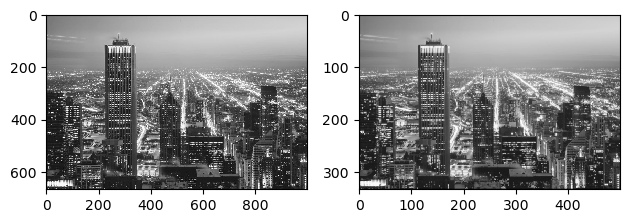

In [77]:
plt.subplot(121)
imshow(gray)
plt.subplot(122)
res = convolution(gray, kernel)
res = relu(res)
res = convolution(gray, kernel)
res = relu(res)
res = convolution(gray, kernel)
res = relu(res)
res = convolution(gray, kernel)
res = relu(res)
res = convolution(gray, kernel)
res = relu(res)
res = convolution(gray, kernel)
res = relu(res)
res = max_pooling(res)
res = np.asarray(res)
imshow(res)


In [82]:
k = np.asarray(max_pooling(gray))
k = np.asarray(max_pooling(k))
k = np.asarray(max_pooling(k))
k = np.asarray(max_pooling(k))

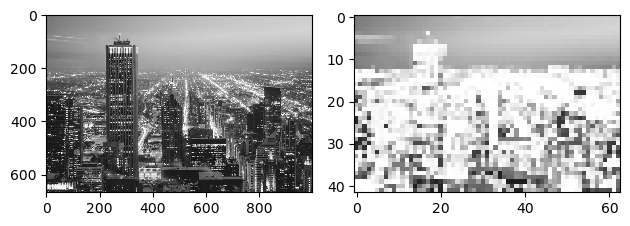

In [83]:
plt.subplot(121)
imshow(gray)
plt.subplot(122)
imshow(k)